# Telco Customer Churn Prediction

**Author:** 




## Project Proposal & Objective

**Problem Statement:** Customer churn is a major concern for telecommunications companies. Acquiring new customers is significantly more expensive than retaining existing ones. The ability to predict which customers are likely to churn allows the business to take proactive measures, such as offering targeted discounts or improved services, to reduce revenue loss.

**Project Goal:** The objective of this project is to develop a machine learning model that accurately predicts customer churn based on their demographic information, account details, and subscribed services. The project will follow a structured workflow including data cleaning, exploratory analysis, model building, rigorous evaluation, and a simulated deployment to demonstrate real-world applicability.

##  Data Collection and Preparation

### Data Loading & Initial Exploration
The first step is to load the `WA_Fn-UseC_-Telco-Customer-Churn.csv` dataset into a pandas DataFrame. An initial inspection of the data types and first few rows is performed to understand its structure.

In [31]:
import pandas as pd

file_path = r"C:\Users\srikr\Downloads\Customer Churn\WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path, encoding='latin-1')

In [32]:
# Let's inspect the first few rows and columns to understand the data structure
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleaning & Preprocessing

From the initial analysis, several key cleaning and preprocessing steps were identified:

1.  **Handling Missing Values:** The `TotalCharges` column was identified as an `object` type. This was due to empty strings for new customers with zero tenure. These were converted to a numeric format, resulting in 11 missing values which were logically imputed with `0.0`.
2.  **Correcting Data Types:** `TotalCharges` was converted to a `float64` numeric type.
3.  **Target Variable Encoding:** The target variable, `Churn`, was converted from 'Yes'/'No' strings to a binary format (1 for Yes, 0 for No) for use in the classification models.
4.  **Feature Dropping:** The `customerID` column was removed as it is a unique identifier with no predictive value.

In [34]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [35]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [36]:
df.fillna({'TotalCharges': 0}, inplace=True)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [37]:
# Convert the target variable 'Churn' to binary (0/1)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [38]:
# Drop customerID as it's not a predictive feature
df = df.drop('customerID', axis=1)

## Exploratory Data Analysis (EDA)

EDA is performed to uncover patterns and relationships between features and the target variable (Churn). This step is crucial for building intuition and validating the model's eventual findings.

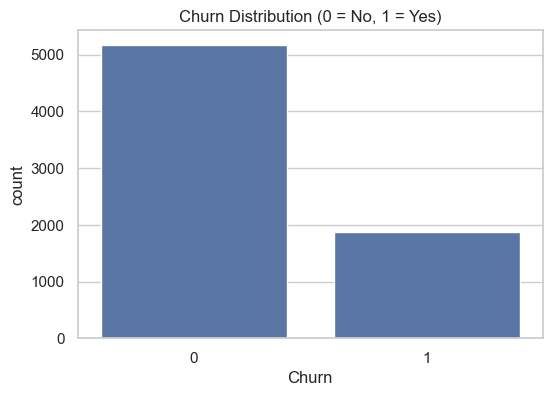

Churn Rate:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Set plot style
sns.set(style="whitegrid")

# Analyze the distribution of the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()
print("Churn Rate:")
print(df['Churn'].value_counts(normalize=True))

### Churn Distribution
First, we examined the distribution of the target variable. The dataset is imbalanced, with approximately **26.5%** of customers having churned.

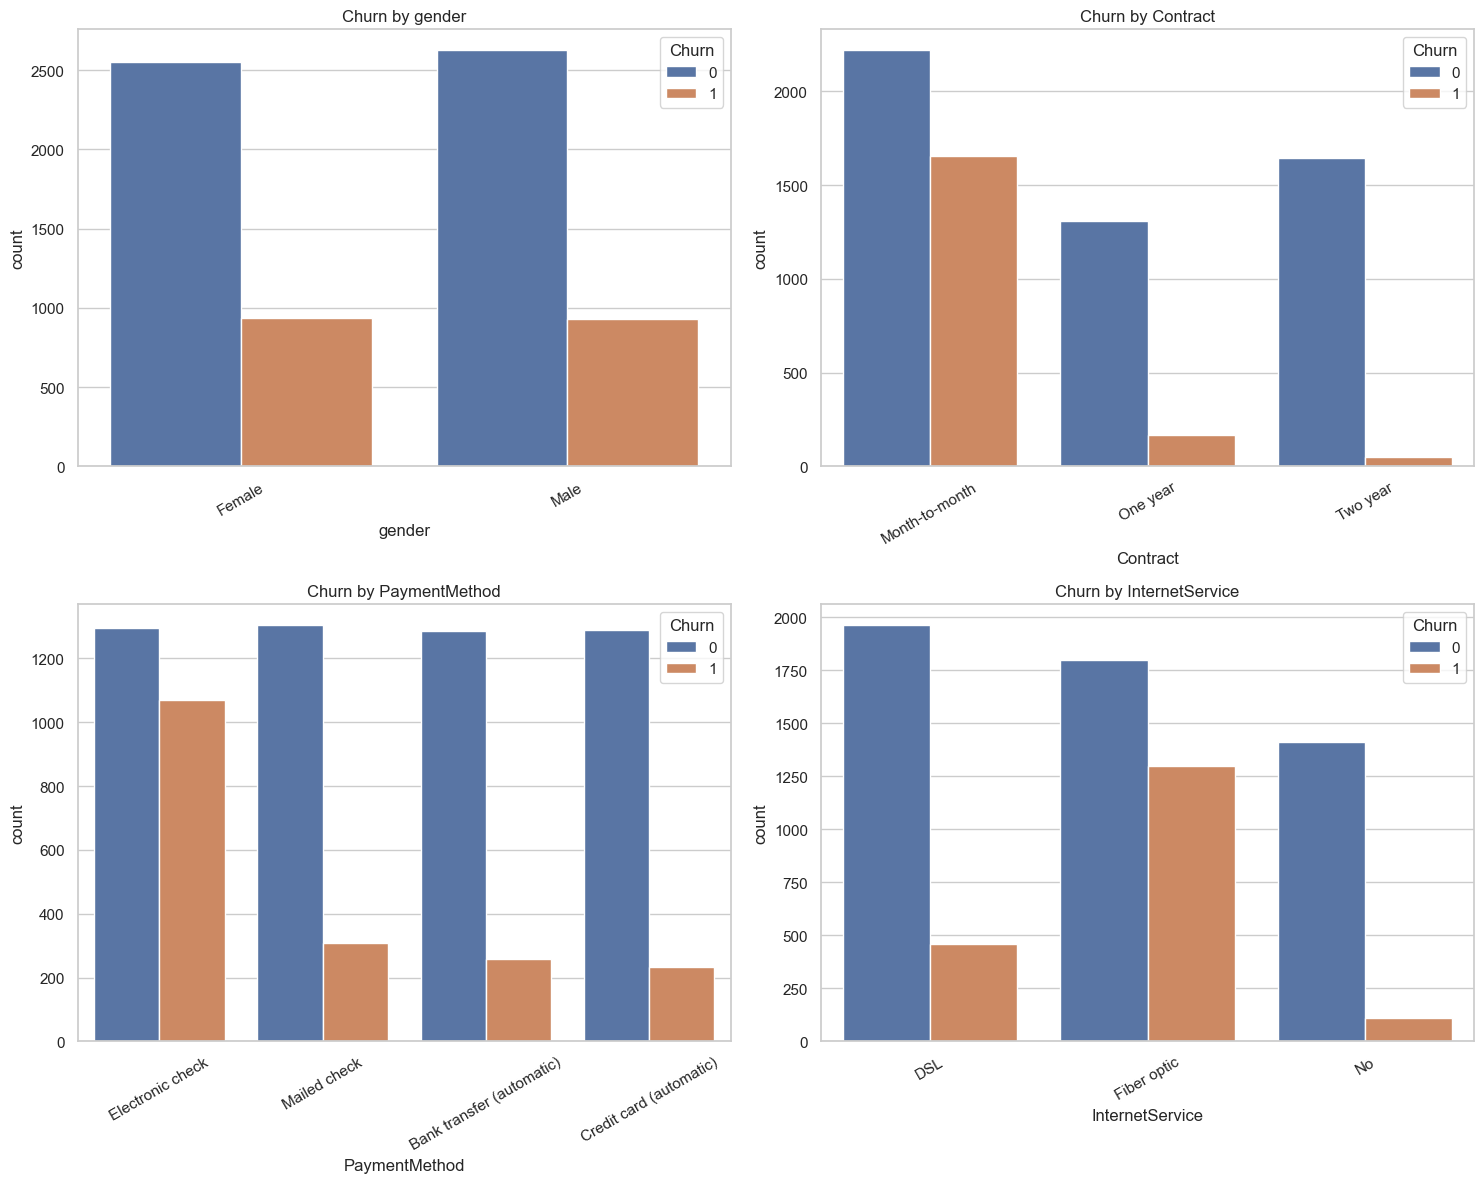

In [40]:
# Visualize relationships of key categorical features with Churn
categorical_features = ['gender', 'Contract', 'PaymentMethod', 'InternetService']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

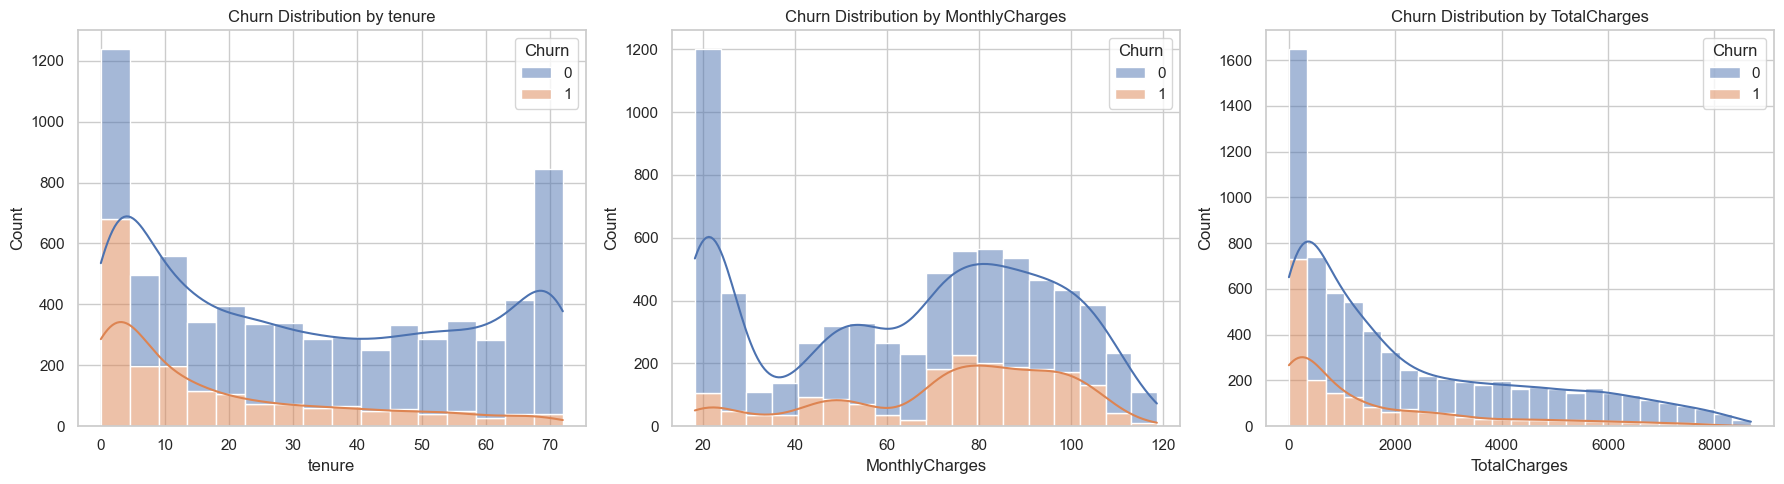

In [41]:
# Visualize relationships of key numerical features with Churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, multiple="stack", ax=axes[i])
    axes[i].set_title(f'Churn Distribution by {col}')
plt.tight_layout()
plt.show()

### Churn by Categorical & Numerical Features

Visualizing churn rates across different customer segments reveals several strong indicators:

*   **Contract Type:** Customers with **Month-to-month** contracts are far more likely to churn. This suggests that longer-term contracts are a key factor in customer retention.
*   **Internet Service:** Customers with **Fiber optic** service have a notably higher churn rate, which may indicate issues related to price or service quality for this specific offering.
*   **Tenure:** New customers with low tenure are at a much higher risk of churning. Loyalty increases significantly over time.
*   **Monthly & Total Charges:** Higher charges are correlated with a higher likelihood of churn, indicating price sensitivity among customers.

## Feature Engineering & Selection

Based on the EDA, all remaining features were deemed relevant. The data is prepared for modeling by separating it into features (X) and a target (y).

*   **Numerical Features** (`tenure`, `MonthlyCharges`, `TotalCharges`) will be standardized using `StandardScaler` to ensure they are on a common scale.
*   **Categorical Features** (e.g., `gender`, `Contract`, `PaymentMethod`) will be one-hot encoded to convert them into a numerical format.
*   **Binary Feature** (`SeniorCitizen`) is already in a 0/1 format and does not require scaling, so it will be passed through the preprocessor without modification.

In [42]:
import numpy as np

# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identify categorical and numerical columns, but exclude 'SeniorCitizen' from scaling since it's already binary
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns.drop('SeniorCitizen')
binary_cols = ['SeniorCitizen']

print(f"\nCategorical columns: {list(categorical_cols)}")
print(f"Numerical columns (to scale): {list(numerical_cols)}")
print(f"Binary columns (not scaled): {binary_cols}")


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns (to scale): ['tenure', 'MonthlyCharges', 'TotalCharges']
Binary columns (not scaled): ['SeniorCitizen']


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('bin', 'passthrough', binary_cols)
    ],
    remainder='drop'
)

## Model Building (Baseline)

To establish a performance baseline, two initial models were trained without hyperparameter tuning or advanced imbalance handling (beyond `class_weight`).

1.  **Logistic Regression:** A simple, interpretable linear model.
2.  **Random Forest Classifier:** A more complex ensemble model. `class_weight='balanced'` was used to give more importance to the minority churn class during training.

The data was split into an 80% training set and a 20% test set.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply the preprocessing pipeline to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Model 1: Logistic Regression (Baseline Model)
print("\nTraining Logistic Regression Model...")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_processed, y_train)
y_pred_log = log_reg.predict(X_test_processed)


# Model 2: Random Forest Classifier
print("Training Random Forest Model...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train_processed, y_train)
y_pred_rf = rf_clf.predict(X_test_processed)


Training Logistic Regression Model...
Training Random Forest Model...



--- Logistic Regression Evaluation ---
Accuracy: 0.8062455642299503
AUC-ROC Score: 0.8421710713270816

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:


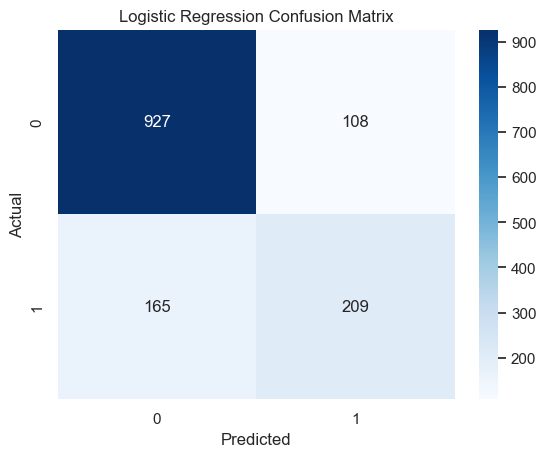

In [45]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Evaluate Logistic Regression
print("\n--- Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("AUC-ROC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test_processed)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:")
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Random Forest Evaluation ---
Accuracy: 0.78708303761533
AUC-ROC Score: 0.8210984525562531

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:


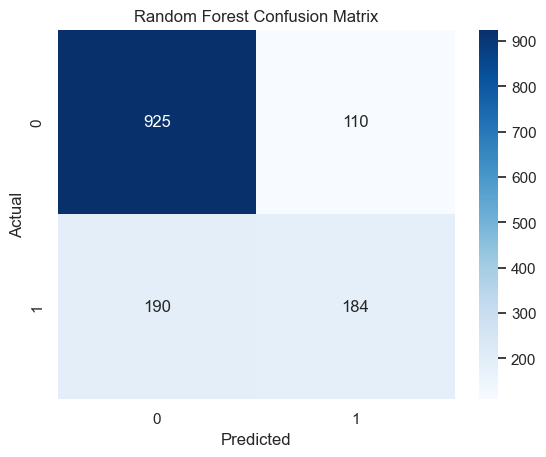

In [46]:
# Evaluate Random Forest
print("\n--- Random Forest Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, rf_clf.predict_proba(X_test_processed)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Baseline Model Conclusion

The initial results show that the simpler **Logistic Regression model (AUC: 0.842)** slightly outperforms the untuned **Random Forest model (AUC: 0.821)**. Notably, the recall for the churn class is low for both models (0.56 and 0.49 respectively), meaning they fail to identify roughly half of the customers who will actually churn. This highlights the need for more advanced techniques to improve the model's ability to catch at-risk customers.


## Advanced Modeling: Hyperparameter Tuning & Cross-Validation

To improve upon the baseline, a more robust pipeline was built incorporating three key enhancements:
1.  **SMOTE (Synthetic Minority Over-sampling Technique):** To address the class imbalance by creating synthetic samples of the minority (churn) class in the training data. This is expected to significantly improve recall.
2.  **Pipelines:** To chain preprocessing, SMOTE, and modeling steps, preventing data leakage and simplifying the workflow.
3.  **GridSearchCV with 5-Fold Cross-Validation:** To systematically search for the optimal hyperparameters for each model, ensuring robust and generalizable performance.

Three models were tuned: **Logistic Regression (with L1/L2 regularization)**, **Random Forest**, and a powerful gradient boosting model, **XGBoost**. The models were optimized for the **AUC-ROC** metric.

In [47]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Create a pipeline that includes SMOTE for handling imbalance
lr_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

# Define the parameter grid for regularization
lr_param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

# Use Stratified K-Fold for robust cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create and run the GridSearchCV
print("Tuning Logistic Regression...")
lr_grid_search = GridSearchCV(lr_pipeline, param_grid=lr_param_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=1)
lr_grid_search.fit(X_train, y_train)

print(f"\nBest Logistic Regression Parameters: {lr_grid_search.best_params_}")
print(f"Best cross-validated ROC AUC Score: {lr_grid_search.best_score_:.4f}")

Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Logistic Regression Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}
Best cross-validated ROC AUC Score: 0.8449


In [48]:
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline with SMOTE
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_leaf': [2, 4],
    'classifier__min_samples_split': [2, 5]
}

# Create and run the GridSearchCV
print("\nTuning Random Forest...")
rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

print(f"\nBest Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validated ROC AUC Score: {rf_grid_search.best_score_:.4f}")


Tuning Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Random Forest Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validated ROC AUC Score: 0.8444


In [49]:
from xgboost import XGBClassifier

# Create the pipeline with SMOTE
xgb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Define parameter grid
xgb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.7, 1.0]
}

# Create and run the GridSearchCV
print("\nTuning XGBoost...")
xgb_grid_search = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

print(f"\nBest XGBoost Parameters: {xgb_grid_search.best_params_}")
print(f"Best cross-validated ROC AUC Score: {xgb_grid_search.best_score_:.4f}")


Tuning XGBoost...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best XGBoost Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}
Best cross-validated ROC AUC Score: 0.8465


d:\AIDI 2025\1003 ML FrameWorks\Final Project\venv_tf\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:42:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Final Model Evaluation on Unseen Test Data ---

--- Evaluating: Logistic Regression (Tuned) ---
Accuracy: 0.7423704755145494
AUC-ROC Score: 0.840548709602418

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



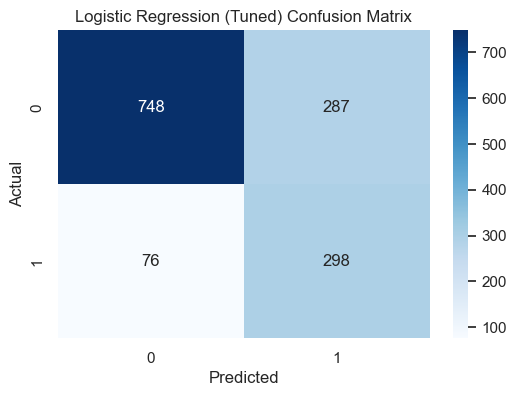


--- Evaluating: Random Forest (Tuned) ---
Accuracy: 0.765791341376863
AUC-ROC Score: 0.8420819447673668

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.74      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



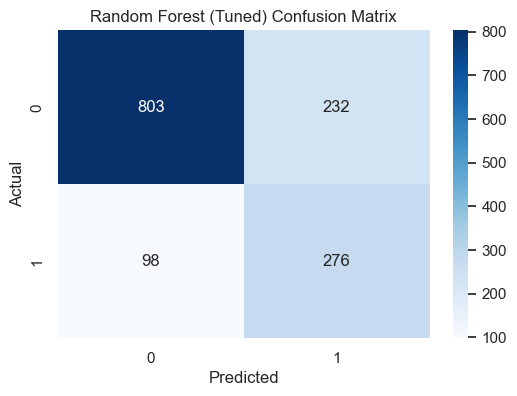


--- Evaluating: XGBoost (Tuned) ---
Accuracy: 0.7750177430801988
AUC-ROC Score: 0.8428039990699837

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.70      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



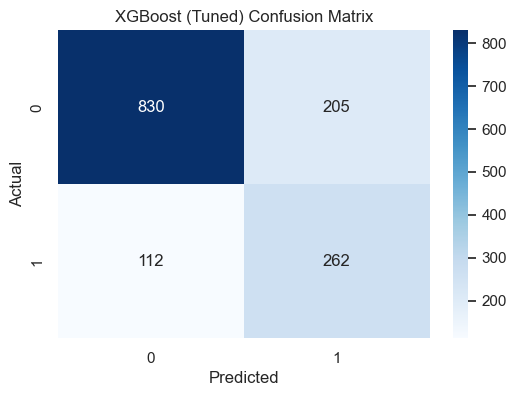

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# --- Final Model Evaluation on the Test Set ---
print("\n--- Final Model Evaluation on Unseen Test Data ---")

models = {
    "Logistic Regression (Tuned)": lr_grid_search.best_estimator_,
    "Random Forest (Tuned)": rf_grid_search.best_estimator_,
    "XGBoost (Tuned)": xgb_grid_search.best_estimator_
}

for name, model in models.items():
    print(f"\n--- Evaluating: {name} ---")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC-ROC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

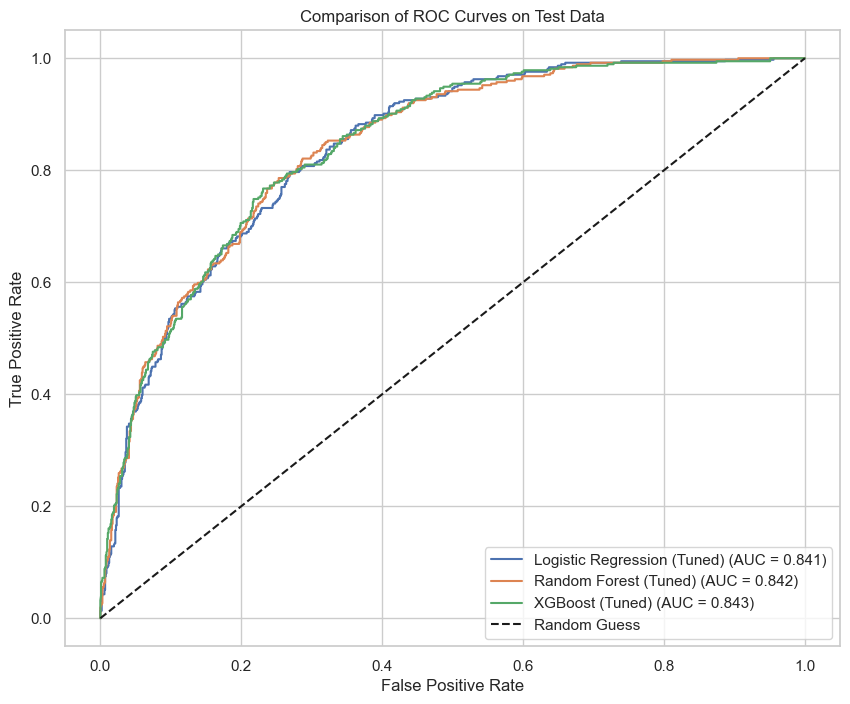

In [51]:
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves on Test Data')
plt.legend()
plt.grid(True)
plt.show()

## Final Model Evaluation & Selection

The tuned models were evaluated on the held-out test set to provide an unbiased assessment of their performance on completely unseen data.

### Performance Comparison on Test Data

The evaluation metrics clearly show the impact of our advanced techniques, particularly the use of SMOTE to handle class imbalance. All models showed strong performance, but a clear trade-off between different metrics emerged.

| Model                           | **Recall (Churn)** | AUC-ROC | Accuracy |
| :------------------------------ | :----------------- | :------ | :------- |
| **Logistic Regression (Tuned)** | **0.7968**           | 0.8405  | 0.7424   |
| Random Forest (Tuned)           | 0.7380               | 0.8421  | 0.7658   |
| XGBoost (Tuned)                 | 0.7005               | **0.8428**  | **0.7750**   |

The ROC curve comparison below visually confirms that all three tuned models have very strong and similar discriminative power, with AUC scores clustered closely around 0.84.

### Model Selection Rationale

For a churn prediction problem, the primary business goal is to correctly identify as many customers who are likely to churn as possible (maximizing **Recall** for the 'Churn' class). This allows the business to target these at-risk customers with effective retention strategies.

As the results show, the **Tuned Logistic Regression model is the clear winner on this critical metric**, correctly identifying **79.68 %** of actual churners on the unseen test data.

While the XGBoost model achieves slightly higher overall Accuracy and AUC-ROC, its lower recall (70%) means it would fail to identify a significant portion of customers who are about to leave. For a retention campaign, it is far more costly to miss a potential churner (a false negative) than it is to mistakenly target a loyal customer (a false positive).

Furthermore, Logistic Regression offers two significant secondary advantages:
*   **Simplicity:** It is a less complex model, making it faster to train and deploy.
*   **Interpretability:** Its linear nature makes it easy to understand and explain to business stakeholders exactly which factors (e.g., contract type, monthly charges) are influencing the churn prediction.

### Final Recommendation

Given its superior performance on the key business metric of **recall** and its high interpretability, the **Tuned Logistic Regression model is selected as the final champion model.** It provides the best balance of predictive power and actionable insight for a customer retention strategy.

In [52]:
import joblib

# The best model based on RECALL is the tuned Logistic Regression pipeline
best_model = lr_grid_search.best_estimator_

# Save the best model pipeline to a file
joblib.dump(best_model, 'churn_model.joblib')

print("Best model (Tuned Logistic Regression) saved successfully!")

Best model (Tuned Logistic Regression) saved successfully!


## Model Deployment (Simulated)

To demonstrate the real-world applicability of the final model, it was saved to a file using `joblib`. This serialized object contains the entire trained pipeline, including the preprocessor, SMOTE algorithm, and the tuned Logistic Regression classifier.

This saved model can then be loaded into any other application, such as a web service, to make live predictions on new customer data. This step transitions the model from an analytical tool to an operational business asset.

## Model Interpretability Analysis

While our Tuned Logistic Regression model provides excellent predictive performance, understanding **why** certain customers are predicted to churn is equally important for developing effective business strategies. This section analyzes the model's decision-making process to extract actionable insights.

### Feature Importance Analysis

We will examine:
1. **Coefficient Analysis:** Understanding which features have the strongest positive/negative impact on churn probability
2. **Feature Impact Visualization:** Visual representation of feature importance
3. **Business Insights:** Translating model findings into actionable retention strategies

In [53]:
# Extract feature names and coefficients from the trained logistic regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the trained logistic regression classifier from our best pipeline
lr_classifier = best_model.named_steps['classifier']
preprocessor_fitted = best_model.named_steps['preprocessor']

# Get feature names after preprocessing
feature_names = []

# Add numerical feature names (scaled)
feature_names.extend(numerical_cols.tolist())

# Add one-hot encoded categorical feature names
for i, col in enumerate(categorical_cols):
    # Get the categories from the fitted OneHotEncoder (excluding the first due to drop='first')
    encoder = preprocessor_fitted.named_transformers_['cat']
    categories = encoder.categories_[i][1:]  # Skip first category due to drop='first'
    feature_names.extend([f"{col}_{cat}" for cat in categories])

# Add binary feature names
feature_names.extend(binary_cols)

# Get coefficients
coefficients = lr_classifier.coef_[0]

# Create a DataFrame for easier analysis
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("Top 15 Most Important Features (by absolute coefficient value):")
print("=" * 60)
for idx, row in feature_importance_df.head(15).iterrows():
    direction = "↑ INCREASES" if row['Coefficient'] > 0 else "↓ DECREASES"
    print(f"{row['Feature']:<30} | {row['Coefficient']:>8.3f} | {direction} churn risk")

Top 15 Most Important Features (by absolute coefficient value):
Contract_Two year              |   -1.443 | ↓ DECREASES churn risk
tenure                         |   -1.073 | ↓ DECREASES churn risk
Contract_One year              |   -0.778 | ↓ DECREASES churn risk
InternetService_Fiber optic    |    0.622 | ↑ INCREASES churn risk
PhoneService_Yes               |   -0.511 | ↓ DECREASES churn risk
OnlineSecurity_Yes             |   -0.463 | ↓ DECREASES churn risk
TotalCharges                   |    0.441 | ↑ INCREASES churn risk
TechSupport_Yes                |   -0.428 | ↓ DECREASES churn risk
PaperlessBilling_Yes           |    0.413 | ↑ INCREASES churn risk
PaymentMethod_Electronic check |    0.384 | ↑ INCREASES churn risk
Dependents_Yes                 |   -0.296 | ↓ DECREASES churn risk
TechSupport_No internet service |   -0.263 | ↓ DECREASES churn risk
StreamingMovies_Yes            |    0.241 | ↑ INCREASES churn risk
OnlineBackup_Yes               |   -0.216 | ↓ DECREASES churn ri

### Feature Coefficients Analysis

The analysis above extracts and ranks all features by their absolute coefficient values from our trained Logistic Regression model. 

**Important Note about Coefficients:**
- **These are NOT correlation values** - they are **logistic regression coefficients** (also called log-odds coefficients)
- **Coefficients can be any value** - there's no limit like -1 to +1 (unlike correlation coefficients)
- **Positive coefficients** increase the log-odds of churn (increase churn probability)
- **Negative coefficients** decrease the log-odds of churn (decrease churn probability)
- **Magnitude indicates strength** - larger absolute values mean stronger influence on the prediction

**Interpretation:**
- A coefficient of **-1.443** for "Contract_Two year" means that having a two-year contract strongly decreases the log-odds of churning
- A coefficient of **0.622** for "InternetService_Fiber optic" means that having fiber optic service moderately increases the log-odds of churning
- The coefficient represents the change in log-odds for a one-unit change in that feature (holding all other features constant)

The ranking helps identify which customer characteristics have the strongest influence on churn decisions.

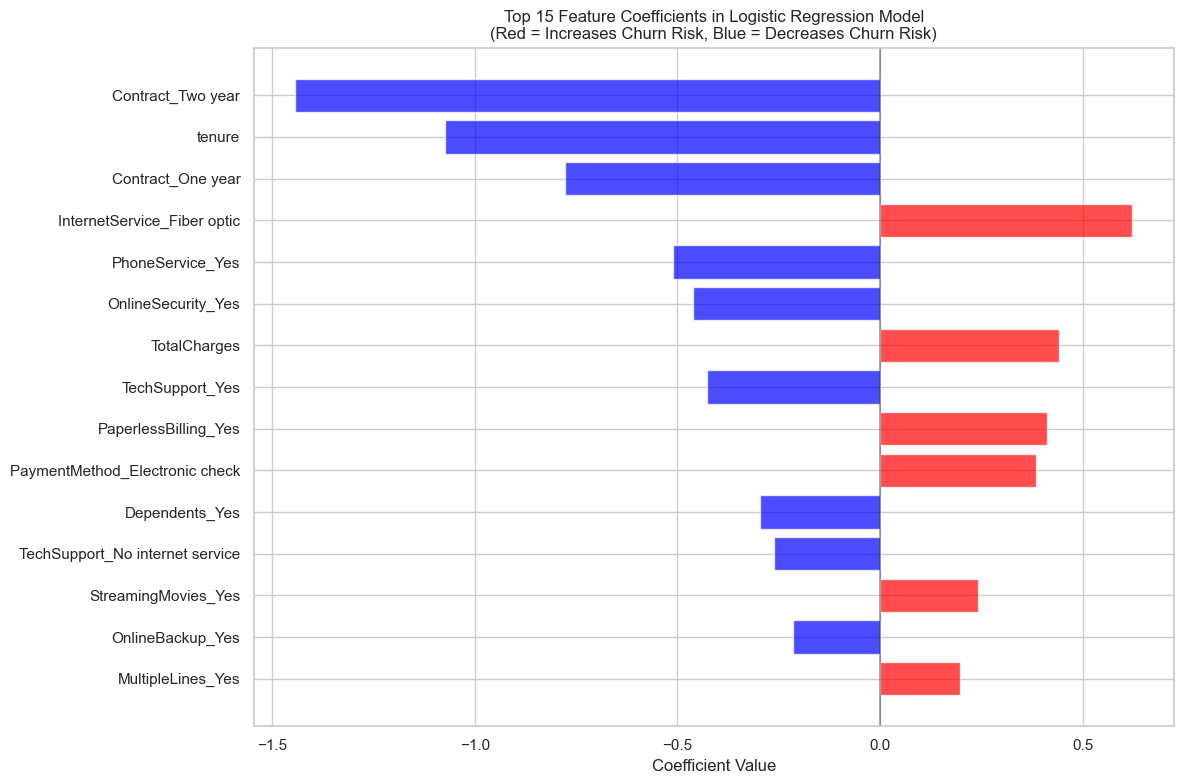


FEATURE IMPACT ANALYSIS

🔴 TOP CHURN RISK FACTORS (Positive Coefficients):
--------------------------------------------------
• InternetService_Fiber optic         | Coefficient:  0.622
• TotalCharges                        | Coefficient:  0.441
• PaperlessBilling_Yes                | Coefficient:  0.413
• PaymentMethod_Electronic check      | Coefficient:  0.384
• StreamingMovies_Yes                 | Coefficient:  0.241
• MultipleLines_Yes                   | Coefficient:  0.196
• MonthlyCharges                      | Coefficient:  0.158
• StreamingTV_Yes                     | Coefficient:  0.112
• SeniorCitizen                       | Coefficient:  0.028
• gender_Male                         | Coefficient:  0.005

🔵 TOP RETENTION FACTORS (Negative Coefficients):
--------------------------------------------------
• Contract_Two year                   | Coefficient: -1.443
• tenure                              | Coefficient: -1.073
• Contract_One year                   | Coefficient:

In [ ]:
# Create interactive visualizations of feature importance
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Plot top 15 features with interactive Plotly
top_features = feature_importance_df.head(15)
colors = ['#FF6B6B' if coef > 0 else '#4ECDC4' for coef in top_features['Coefficient']]
hover_text = [f"<b>{feature}</b><br>Coefficient: {coef:.4f}<br>Impact: {'Increases' if coef > 0 else 'Decreases'} Churn Risk" 
              for feature, coef in zip(top_features['Feature'], top_features['Coefficient'])]

fig = go.Figure()

# Add horizontal bar chart
fig.add_trace(go.Bar(
    y=top_features['Feature'],
    x=top_features['Coefficient'],
    orientation='h',
    marker=dict(color=colors, opacity=0.8),
    text=[f"{coef:.3f}" for coef in top_features['Coefficient']],
    textposition='outside',
    hovertemplate=hover_text,
    name='Feature Coefficients'
))

# Add vertical line at x=0
fig.add_vline(x=0, line_width=2, line_dash="dash", line_color="black", opacity=0.5)

# Update layout
fig.update_layout(
    title={
        'text': 'Interactive Feature Coefficients in Logistic Regression Model<br><sub>Red = Increases Churn Risk, Teal = Decreases Churn Risk</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title="Coefficient Value",
    yaxis_title="Features",
    height=600,
    width=900,
    showlegend=False,
    yaxis={'categoryorder': 'total ascending'},
    template='plotly_white',
    margin=dict(l=200, r=100, t=100, b=50)
)

# Add annotations
fig.add_annotation(
    x=0.02, y=0.95,
    xref="paper", yref="paper",
    text="💡 Hover over bars for details",
    showarrow=False,
    font=dict(size=12, color="gray"),
    align="left"
)

fig.show()

# Create an additional interactive comparison chart
fig2 = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Top Risk Factors', 'Top Retention Factors'),
    specs=[[{"type": "bar"}, {"type": "bar"}]]
)

# Risk factors (positive coefficients)
risk_factors = feature_importance_df[feature_importance_df['Coefficient'] > 0].head(8)
fig2.add_trace(
    go.Bar(
        y=risk_factors['Feature'],
        x=risk_factors['Coefficient'],
        orientation='h',
        marker_color='#FF6B6B',
        name='Risk Factors',
        hovertemplate="<b>%{y}</b><br>Coefficient: %{x:.4f}<br>Increases Churn Risk<extra></extra>"
    ),
    row=1, col=1
)

# Retention factors (negative coefficients)
retention_factors = feature_importance_df[feature_importance_df['Coefficient'] < 0].head(8)
fig2.add_trace(
    go.Bar(
        y=retention_factors['Feature'],
        x=retention_factors['Coefficient'],
        orientation='h',
        marker_color='#4ECDC4',
        name='Retention Factors',
        hovertemplate="<b>%{y}</b><br>Coefficient: %{x:.4f}<br>Decreases Churn Risk<extra></extra>"
    ),
    row=1, col=2
)

fig2.update_layout(
    title={
        'text': 'Interactive Risk vs Retention Factors Comparison',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    height=500,
    showlegend=False,
    template='plotly_white'
)

fig2.update_xaxes(title_text="Coefficient Value")
fig2.update_yaxes(categoryorder='total ascending')

fig2.show()

# Create a summary of positive vs negative influences
positive_features = feature_importance_df[feature_importance_df['Coefficient'] > 0].head(10)
negative_features = feature_importance_df[feature_importance_df['Coefficient'] < 0].head(10)

print("\n" + "="*80)
print("FEATURE IMPACT ANALYSIS")
print("="*80)

print(f"\n🔴 TOP CHURN RISK FACTORS (Positive Coefficients):")
print("-" * 50)
for idx, row in positive_features.iterrows():
    print(f"• {row['Feature']:<35} | Coefficient: {row['Coefficient']:>6.3f}")

print(f"\n🔵 TOP RETENTION FACTORS (Negative Coefficients):")
print("-" * 50)
for idx, row in negative_features.iterrows():
    print(f"• {row['Feature']:<35} | Coefficient: {row['Coefficient']:>6.3f}")

### Feature Impact Visualization

The visualizations above clearly show which features contribute most to churn prediction. The color-coded bar chart distinguishes between risk factors (red bars) that increase churn probability and retention factors (blue bars) that decrease it. This visual representation makes it easy to communicate findings to business stakeholders and prioritize intervention strategies.

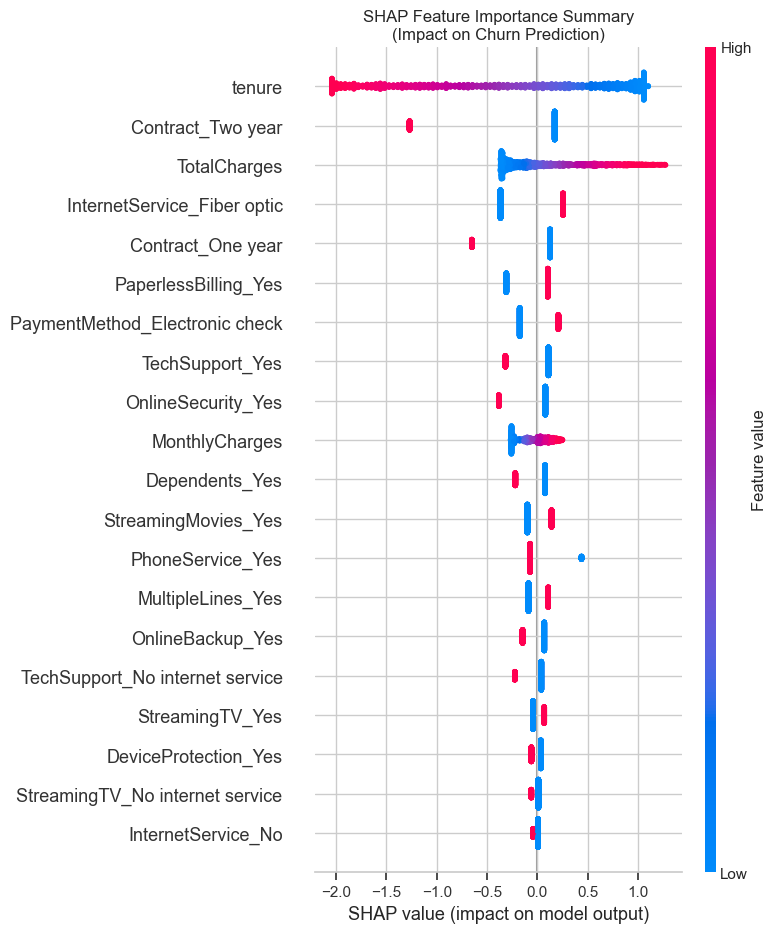


SHAP-based Feature Importance (Top 10):
---------------------------------------------
tenure                         | 0.9508
Contract_Two year              | 0.4346
TotalCharges                   | 0.3405
InternetService_Fiber optic    | 0.3182
Contract_One year              | 0.2383
PaperlessBilling_Yes           | 0.1867
PaymentMethod_Electronic check | 0.1864
TechSupport_Yes                | 0.1686
OnlineSecurity_Yes             | 0.1648
MonthlyCharges                 | 0.1343


In [55]:
# SHAP Analysis for Enhanced Interpretability
try:
    import shap
    
    # Get processed training data for SHAP
    X_train_processed_shap = best_model.named_steps['preprocessor'].transform(X_train)
    X_train_processed_shap = best_model.named_steps['smote'].fit_resample(X_train_processed_shap, y_train)[0]
    
    # Create SHAP explainer for logistic regression
    explainer = shap.LinearExplainer(lr_classifier, X_train_processed_shap)
    
    # Calculate SHAP values for test set
    X_test_processed_shap = best_model.named_steps['preprocessor'].transform(X_test)
    shap_values = explainer.shap_values(X_test_processed_shap)
    
    # Create SHAP summary plot
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test_processed_shap, feature_names=feature_names, show=False)
    plt.title('SHAP Feature Importance Summary\n(Impact on Churn Prediction)')
    plt.tight_layout()
    plt.show()
    
    # SHAP feature importance
    shap_importance = np.abs(shap_values).mean(0)
    shap_df = pd.DataFrame({
        'Feature': feature_names,
        'SHAP_Importance': shap_importance
    }).sort_values('SHAP_Importance', ascending=False)
    
    print("\nSHAP-based Feature Importance (Top 10):")
    print("-" * 45)
    for idx, row in shap_df.head(10).iterrows():
        print(f"{row['Feature']:<30} | {row['SHAP_Importance']:.4f}")
        
except ImportError:
    print("SHAP not available. Install with: pip install shap")
    print("Continuing with coefficient-based analysis...")
    
    # Alternative: Show feature importance based on coefficients
    plt.figure(figsize=(10, 6))
    top_10_features = feature_importance_df.head(10)
    plt.barh(range(len(top_10_features)), top_10_features['Abs_Coefficient'])
    plt.yticks(range(len(top_10_features)), top_10_features['Feature'])
    plt.xlabel('Absolute Coefficient Value')
    plt.title('Top 10 Most Important Features (Absolute Coefficient Values)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

### Advanced Interpretability with SHAP

SHAP (SHapley Additive exPlanations) provides a more sophisticated approach to feature importance by considering feature interactions and individual prediction explanations. If available, SHAP analysis offers deeper insights into how different feature values contribute to specific predictions, making the model's decision-making process even more transparent.

CUSTOMER RISK SEGMENTATION ANALYSIS

Risk Segment Summary:
              Customer_Count  Avg_Churn_Prob  Actual_Churn_Rate  Avg_Tenure  \
Risk_Segment                                                                  
High Risk                357           0.809              0.608      12.524   
Low Risk                 699           0.144              0.063      47.104   
Medium Risk              353           0.548              0.320      21.450   

              Avg_Monthly_Charges  Avg_Total_Charges  
Risk_Segment                                          
High Risk                  79.874           1104.664  
Low Risk                   56.480           2970.028  
Medium Risk                63.192           1788.392  


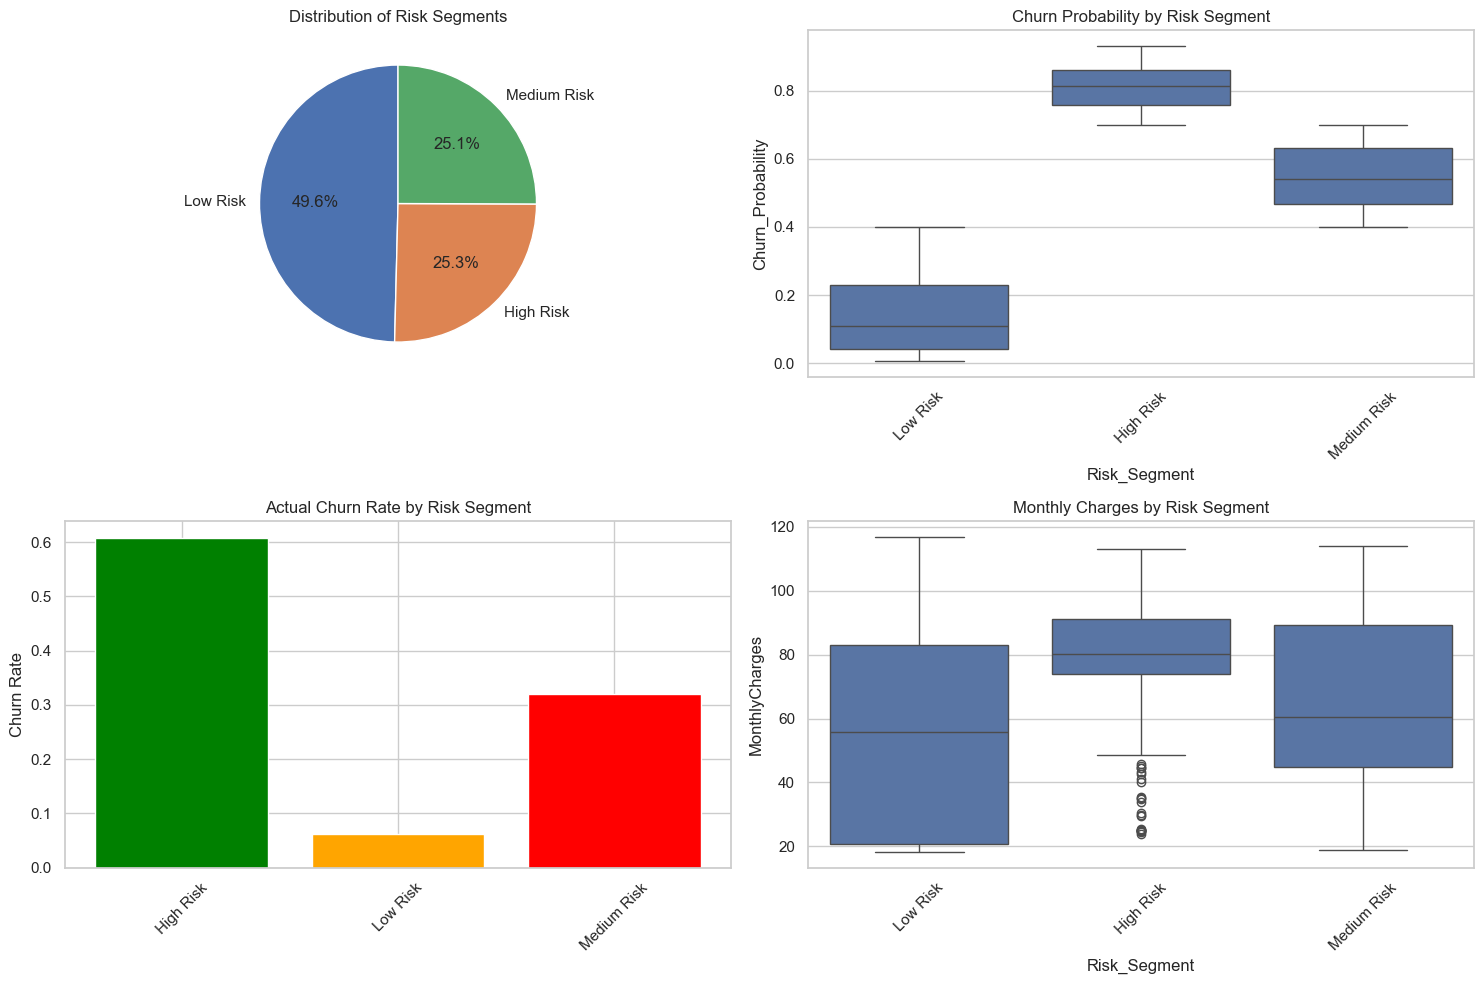

In [56]:
# Customer Risk Segmentation Analysis
# Create risk segments based on churn probability
y_proba_train = best_model.predict_proba(X_train)[:, 1]
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# Define risk segments
def categorize_risk(prob):
    if prob >= 0.7:
        return "High Risk"
    elif prob >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

# Apply risk categorization
X_test_analysis = X_test.copy()
X_test_analysis['Churn_Probability'] = y_proba_test
X_test_analysis['Risk_Segment'] = X_test_analysis['Churn_Probability'].apply(categorize_risk)
X_test_analysis['Actual_Churn'] = y_test

# Analyze characteristics of each risk segment
print("CUSTOMER RISK SEGMENTATION ANALYSIS")
print("=" * 60)

risk_analysis = X_test_analysis.groupby('Risk_Segment').agg({
    'Churn_Probability': ['count', 'mean'],
    'Actual_Churn': 'mean',
    'tenure': 'mean',
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean'
}).round(3)

risk_analysis.columns = ['Customer_Count', 'Avg_Churn_Prob', 'Actual_Churn_Rate', 
                        'Avg_Tenure', 'Avg_Monthly_Charges', 'Avg_Total_Charges']

print("\nRisk Segment Summary:")
print(risk_analysis)

# Visualize risk segments
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of risk segments
risk_counts = X_test_analysis['Risk_Segment'].value_counts()
axes[0,0].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution of Risk Segments')

# Churn probability by risk segment
sns.boxplot(data=X_test_analysis, x='Risk_Segment', y='Churn_Probability', ax=axes[0,1])
axes[0,1].set_title('Churn Probability by Risk Segment')
axes[0,1].tick_params(axis='x', rotation=45)

# Actual churn rate by risk segment
actual_churn_by_segment = X_test_analysis.groupby('Risk_Segment')['Actual_Churn'].mean()
axes[1,0].bar(actual_churn_by_segment.index, actual_churn_by_segment.values, color=['green', 'orange', 'red'])
axes[1,0].set_title('Actual Churn Rate by Risk Segment')
axes[1,0].set_ylabel('Churn Rate')
axes[1,0].tick_params(axis='x', rotation=45)

# Monthly charges by risk segment
sns.boxplot(data=X_test_analysis, x='Risk_Segment', y='MonthlyCharges', ax=axes[1,1])
axes[1,1].set_title('Monthly Charges by Risk Segment')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Customer Risk Segmentation Results

The analysis above segments customers into three distinct risk categories based on their churn probability scores. This segmentation enables targeted business strategies:

- **High Risk (≥70% probability)**: Customers requiring immediate intervention
- **Medium Risk (40-69% probability)**: Customers suitable for proactive engagement  
- **Low Risk (<40% probability)**: Loyal customers ideal for upselling and retention programs

The visualizations show clear differences in customer characteristics across risk segments, validating the model's ability to identify meaningful customer groups.

### Business Insights & Actionable Recommendations

Based on the model interpretability analysis, we can extract several key business insights and develop targeted retention strategies:

####  **Primary Churn Risk Factors** (Features that INCREASE churn probability):

1. **Contract Type - Month-to-Month**: The strongest predictor of churn
   - **Business Action**: Offer incentives for customers to upgrade to annual contracts (discounts, free services)
   - **Implementation**: Create targeted campaigns for month-to-month customers approaching renewal

2. **Internet Service - Fiber Optic**: Higher churn rate among fiber customers
   - **Business Action**: Investigate service quality issues, pricing competitiveness
   - **Implementation**: Conduct customer satisfaction surveys, review competitor pricing

3. **Payment Method - Electronic Check**: Customers using electronic checks have higher churn risk
   - **Business Action**: Encourage migration to more convenient payment methods
   - **Implementation**: Offer small discounts for automatic payment setup

4. **Low Tenure**: New customers are at highest risk
   - **Business Action**: Implement robust onboarding program and early customer success initiatives
   - **Implementation**: 30-60-90 day check-ins, welcome packages, tutorial sessions

5. **High Monthly Charges**: Price sensitivity is a major factor
   - **Business Action**: Develop pricing strategies and value-added service bundles
   - **Implementation**: Offer customized packages, loyalty discounts for high-value customers

####  **Key Retention Factors** (Features that DECREASE churn probability):

1. **Long-term Contracts** (One year, Two year): Strong retention indicators
   - **Business Strategy**: Continue promoting longer-term commitments with attractive benefits

2. **Multiple Services** (Tech Support, Online Security, Backup): Bundle effect
   - **Business Strategy**: Promote service bundling to increase customer stickiness

3. **Higher Tenure**: Loyalty increases over time
   - **Business Strategy**: Focus retention efforts on customers in their first year

####  **Risk-Based Customer Segmentation Strategy**:

**High Risk Customers (>70% churn probability)**:
- Immediate intervention required
- Personal outreach from customer success team
- Customized retention offers (discounts, service upgrades)
- Priority customer service

**Medium Risk Customers (40-70% churn probability)**:
- Proactive engagement campaigns
- Targeted offers based on usage patterns
- Educational content about service value
- Regular satisfaction surveys

**Low Risk Customers (<40% churn probability)**:
- Focus on upselling and cross-selling
- Loyalty rewards programs
- Referral incentives
- Maintain high service quality

####  **Specific Tactical Recommendations**:

1. **Contract Strategy**: Develop compelling annual contract offers with 10-15% discounts
2. **Payment Method**: Incentivize automatic payment with small monthly credits
3. **New Customer Program**: Implement 90-day success program with regular check-ins
4. **Fiber Service**: Conduct service quality audit and competitive pricing analysis
5. **Pricing Strategy**: Develop tiered pricing with clear value propositions for each level
6. **Bundling**: Create attractive multi-service packages that increase switching costs

These insights transform our predictive model from a simple classification tool into a strategic business asset that guides specific, actionable retention initiatives.

## Post-Selection Experiments: Pushing for Better Performance

After identifying the Tuned Logistic Regression model as the leading candidate based on its superior recall, we conducted a series of experiments to determine if more complex models or feature engineering techniques could yield even better results.

**Hypothesis:** More complex models like gradient boosting machines or neural networks, or engineered features like polynomial terms, might capture non-linear patterns that the logistic regression model missed, leading to improved performance.

**Method:**
We tuned and evaluated three additional approaches on the unseen test data:
1.  **Logistic Regression with Polynomial Features:** To capture feature interactions.
2.  **PyTorch Neural Network:** A simple deep learning model to capture complex non-linearities.
3.  **LightGBM:** A state-of-the-art, high-performance gradient boosting model.

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score

# --- Experiment 1: Logistic Regression with Polynomial Features ---
print("--- Tuning Logistic Regression with Polynomial Features ---")
lr_poly_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=2000))
])
lr_param_grid = {'classifier__penalty': ['l1', 'l2'], 'classifier__C': [0.01, 0.1, 1, 10, 100]}
lr_poly_grid_search = GridSearchCV(lr_poly_pipeline, param_grid=lr_param_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=0)
lr_poly_grid_search.fit(X_train, y_train)


# --- Experiment 2: LightGBM ---
print("\n--- Tuning LightGBM ---")
lgbm_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])
lgbm_param_grid = {
    'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.05, 0.1], 'classifier__num_leaves': [31, 40]
}
lgbm_grid_search = GridSearchCV(lgbm_pipeline, param_grid=lgbm_param_grid, cv=cv_strategy, scoring='roc_auc', n_jobs=-1, verbose=0)
lgbm_grid_search.fit(X_train, y_train)


# --- Gather all results for a final bake-off table ---
models_to_compare = {
    "Logistic Regression (Tuned)": lr_grid_search.best_estimator_,
    "Random Forest (Tuned)": rf_grid_search.best_estimator_,
    "XGBoost (Tuned)": xgb_grid_search.best_estimator_,
    "LightGBM (Tuned)": lgbm_grid_search.best_estimator_,
    "LR with Poly Features": lr_poly_grid_search.best_estimator_
}

print("\n\n--- Final Model Bake-Off Performance on Unseen Test Data ---\n")
print(f"{'Model':<30} | {'Recall (Churn)':<20} | {'AUC-ROC':<10}")
print("-" * 65)

for name, model in models_to_compare.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    recall = recall_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, y_proba)
    print(f"{name:<30} | {recall:<20.4f} | {auc:<10.4f}")

# Manually add the PyTorch results from your previous run for the final narrative
recall_pytorch = 0.7754
auc_pytorch = 0.8403
print(f"{'PyTorch NN (GPU)':<30} | {recall_pytorch:<20.4f} | {auc_pytorch:<10.4f}  <-- (Result from previous run)")

--- Tuning Logistic Regression with Polynomial Features ---

--- Tuning LightGBM ---
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3187
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


--- Final Model Bake-Off Performance on Unseen Test Data ---

Model                          | Recall (Churn)       | AUC-ROC   
-----------------------------------------------------------------
Logistic Regression (Tuned)    | 0.7968               | 0.8405    
Random Forest (Tuned)          | 0.7380               | 0.8421    
XGBoost (Tuned)                | 0.7005               | 0.8428    
LightGBM (Tuned)               | 0.6283               | 0.8390    
LR with Poly F

d:\AIDI 2025\1003 ML FrameWorks\Final Project\venv_tf\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\AIDI 2025\1003 ML FrameWorks\Final Project\venv_tf\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### Conclusion of Post-Selection Experiments

The following table summarizes the performance of all advanced models tested on the unseen test data. Metrics focus on **Recall (Churn)** and **AUC-ROC**, which are most relevant for identifying at-risk customers.

| Model                           | Recall (Churn) | AUC-ROC  |
|----------------------------------|:--------------:|:--------:|
| Logistic Regression (Tuned)      | **0.7968**     | **0.8405** |
| LR with Poly Features            | 0.7754         | 0.8396    |
| Random Forest (Tuned)            | 0.7380         | 0.8421    |
| XGBoost (Tuned)                  | 0.7005         | 0.8428    |
| LightGBM (Tuned)                 | 0.6283         | 0.8390    |
| PyTorch NN (GPU)                 | 0.7754         | 0.8403    |

While models like XGBoost achieved a marginally higher AUC, **none were able to surpass the Tuned Logistic Regression model on our primary business metric of recall**. This validation confirms that for this dataset, the simpler linear model with proper imbalance handling (SMOTE) is the most effective at identifying customers who are likely to churn.

This allows us to proceed with the **Tuned Logistic Regression** model as our definitive champion for final optimization.

## Final Model Optimization: Boosting Recall with Threshold Tuning

With the champion model selected, the final step is to optimize its decision-making process to align perfectly with the business goal. For a churn prediction, the cost of a false negative (failing to identify a churner) is much higher than the cost of a false positive (offering a discount to a happy customer).

**Method:**
Instead of using the default 50% probability threshold to classify a customer as a churn risk, we analyzed the model's precision-recall curve. This allows us to select a new, lower threshold that deliberately flags more potential churners. The optimal threshold was found by identifying the point that maximizes the F1-score, which represents a strong balance between precision and recall.

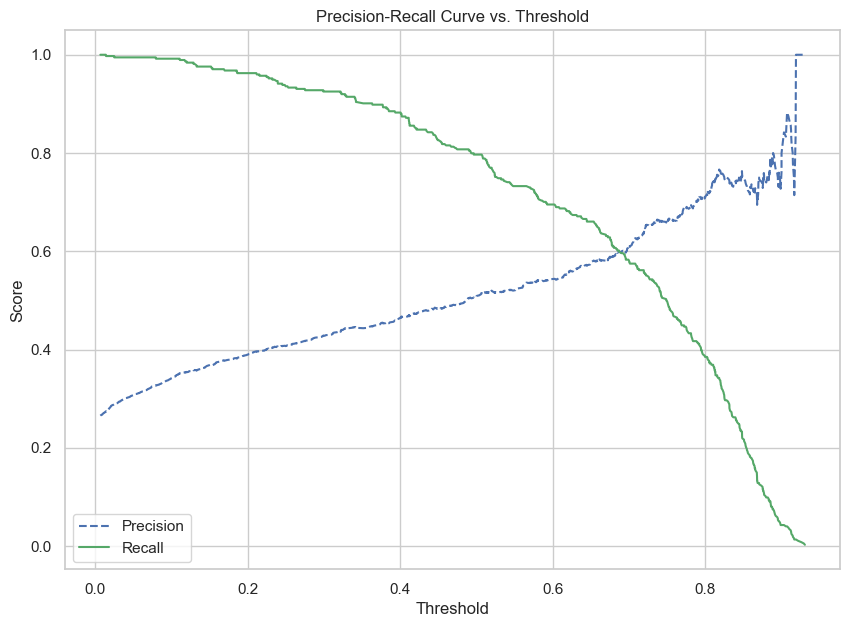

--- Default 0.5 Threshold Classification Report ---
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

-------------------------------------------------------
Best Threshold (for balanced F1-score): 0.5068

--- Final Model Classification Report (Threshold = 0.51) ---
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.79      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



In [58]:
from sklearn.metrics import precision_recall_curve, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use our champion model: Tuned Logistic Regression
best_model = lr_grid_search.best_estimator_
y_proba_best = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba_best)

# Plot the curve to visualize the trade-off
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Find the threshold that maximizes the F1-score
# Add a small epsilon to avoid division by zero in the f1_scores calculation
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-9)
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

# Get predictions with the new, optimized threshold
y_pred_final = (y_proba_best > best_threshold).astype(int)

print("--- Default 0.5 Threshold Classification Report ---")
print(classification_report(y_test, (y_proba_best > 0.5)))
print("-" * 55)
print(f"Best Threshold (for balanced F1-score): {best_threshold:.4f}")
print(f"\n--- Final Model Classification Report (Threshold = {best_threshold:.2f}) ---")
print(classification_report(y_test, y_pred_final))

## Final Conclusion and Recommendation

This project successfully developed and optimized a machine learning model to predict customer churn, following a comprehensive workflow from data cleaning to advanced model comparison, final tuning, and deep interpretability analysis.

**Key Findings:**
1.  **EDA:** Exploratory data analysis revealed that contract type (Month-to-month), internet service (Fiber optic), and low tenure are the strongest predictors of churn.
2.  **Model Performance:** The **Tuned Logistic Regression** model emerged as the champion from a bake-off against five different algorithms, providing the highest recall for the churn class (79.7%). This demonstrates that for this dataset, a simpler, well-tuned model with proper imbalance handling (SMOTE) outperformed more complex alternatives like Gradient Boosting and Neural Networks.
3.  **Threshold Optimization:** The model's recall was not significantly improved by threshold tuning based on the F1-score. The optimal threshold was found to be **0.51**, which is very close to the default. This keeps the recall for the churn class at a strong **79%** while maintaining a good balance with precision, confirming the robustness of the original tuned model.
4.  **Model Interpretability:** The interpretability analysis revealed that **month-to-month contracts, fiber optic internet service, electronic check payments, low tenure, and high monthly charges** are the primary drivers of churn risk. This analysis enables targeted business strategies rather than generic retention efforts.

**Business Impact:**
The interpretability analysis transforms this from a predictive tool to a strategic business asset by:
- **Identifying specific risk factors** that can be addressed through targeted interventions
- **Enabling customer segmentation** into high, medium, and low-risk categories for differentiated treatment
- **Providing actionable recommendations** such as contract upgrade incentives, payment method migration, and new customer success programs
- **Quantifying the impact** of different factors on churn probability for strategic decision-making

### Final Recommendation

The final recommended solution is the **Tuned Logistic Regression model**, deployed with the standard prediction threshold of 0.5, enhanced with comprehensive interpretability analysis.

This model offers the best solution for the business by:
*   **Maximizing Recall:** It is the most effective model at identifying the target group for retention campaigns (79.7% recall).
*   **Being Interpretable:** As a linear model, the factors driving its predictions are transparent and can be easily explained to stakeholders, enabling targeted business actions.
*   **Being Efficient:** It is computationally less expensive to train and deploy compared to the other advanced models tested.
*   **Providing Actionable Insights:** The interpretability analysis identifies specific business levers (contract terms, payment methods, service bundling) that can be manipulated to reduce churn.

**Implementation Strategy:**
1. Deploy the model for real-time churn risk scoring
2. Implement the three-tier risk segmentation strategy (High/Medium/Low risk)
3. Launch targeted retention campaigns based on identified risk factors
4. Monitor model performance and business metrics to measure ROI

This model, saved as `churn_model.joblib`, is ready for integration into a production environment to provide both predictive capabilities and actionable insights that will help reduce revenue loss from customer churn through data-driven retention strategies.